In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[123.   107.   120.  ]
   [116.   100.   113.  ]
   [113.    97.   110.  ]
   ...
   [132.25 111.25 126.25]
   [132.25 111.25 126.25]
   [134.25 113.25 128.25]]

  [[122.   106.   119.  ]
   [115.25  99.25 112.25]
   [115.    99.   112.  ]
   ...
   [122.75 101.75 116.75]
   [116.25  95.25 110.25]
   [136.25 115.25 130.25]]

  [[130.75 114.75 127.75]
   [110.    94.   107.  ]
   [108.25  92.25 105.25]
   ...
   [128.   107.   122.  ]
   [142.   121.   136.  ]
   [138.   117.   132.  ]]

  ...

  [[132.   120.   134.  ]
   [158.75 146.75 160.75]
   [160.   148.   162.  ]
   ...
   [183.5  172.5  186.5 ]
   [182.25 171.25 185.25]
   [192.25 181.25 195.25]]

  [[154.5  142.5  156.5 ]
   [160.75 148.75 162.75]
   [155.   143.   157.  ]
   ...
   [188.   177.   191.  ]
   [183.75 172.75 186.75]
   [169.5  158.5  172.5 ]]

  [[143.75 131.75 145.75]
   [127.   115.   129.  ]
   [148.   136.   150.  ]
   ...
   [189.   178.   192.  ]
   [186.   175.   189.  ]
   [189.   178.   19

In [16]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()

#Building Convolution Layer

In [20]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Dropout(0.25)) #to avoid overfitting

In [34]:
model.add(Flatten())

In [36]:
model.add(Dense(units=1500,activation='relu'))

In [38]:
model.add(Dropout(0.4))

#Output Layer

In [41]:
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

### Model Training

In [47]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 290s 125ms/step - loss: 1.4246 - accuracy: 0.5816 - val_loss: 0.5298 - val_accuracy: 0.8321
Epoch 2/10
2197/2197 [==============================] - 432s 197ms/step - loss: 0.4600 - accuracy: 0.8552 - val_loss: 0.3043 - val_accuracy: 0.9037
Epoch 3/10
2197/2197 [==============================] - 487s 221ms/step - loss: 0.2821 - accuracy: 0.9107 - val_loss: 0.2159 - val_accuracy: 0.9315
Epoch 4/10
2197/2197 [==============================] - 486s 221ms/step - loss: 0.1982 - accuracy: 0.9366 - val_loss: 0.1721 - val_accuracy: 0.9425
Epoch 5/10
2197/2197 [==============================] - 274s 125ms/step - loss: 0.1510 - accuracy: 0.9516 - val_loss: 0.1410 - val_accuracy: 0.9538
Epoch 6/10
2197/2197 [==============================] - 303s 138ms/step - loss: 0.1170 - accuracy: 0.9617 - val_loss: 0.1503 - val_accuracy: 0.9530
Epoch 7/10
2197/2197 [==============================] - 318s 145ms/step - loss: 0.0948 - accuracy: 0.9697 - val_

# Model Evaluation

### Model Evaluation on Training set

In [53]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 85s 38ms/step - loss: 0.0184 - accuracy: 0.9943


In [55]:
print(train_loss,train_acc)

0.018355881795287132 0.9942954778671265


### Model on validation set

In [58]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 22s 39ms/step - loss: 0.0979 - accuracy: 0.9701


In [60]:
print(val_loss,val_acc)

0.09789544343948364 0.9701229333877563


### Saving Model

In [64]:
model.save("trained_model.h5")

In [66]:
model.save("trained_model.keras")

In [68]:
training_history.history

{'loss': [1.4246126413345337,
  0.460008442401886,
  0.28211885690689087,
  0.19824451208114624,
  0.150956928730011,
  0.1169562041759491,
  0.09476340562105179,
  0.08152061700820923,
  0.06602097302675247,
  0.06248368322849274],
 'accuracy': [0.5816060900688171,
  0.8552244305610657,
  0.9107475876808167,
  0.9365531206130981,
  0.951575517654419,
  0.9617326855659485,
  0.9696706533432007,
  0.9733693599700928,
  0.977978527545929,
  0.9799416661262512],
 'val_loss': [0.5297510623931885,
  0.30430686473846436,
  0.2158631533384323,
  0.17213977873325348,
  0.14098642766475677,
  0.15028437972068787,
  0.15862412750720978,
  0.12801873683929443,
  0.12023307383060455,
  0.09789547324180603],
 'val_accuracy': [0.8320623636245728,
  0.9036535620689392,
  0.9314818978309631,
  0.9424653053283691,
  0.9538470506668091,
  0.9529933929443359,
  0.948554515838623,
  0.9608467817306519,
  0.963350772857666,
  0.9701229333877563]}

In [70]:
# Record History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [83]:
training_history.history['val_accuracy']

[0.8320623636245728,
 0.9036535620689392,
 0.9314818978309631,
 0.9424653053283691,
 0.9538470506668091,
 0.9529933929443359,
 0.948554515838623,
 0.9608467817306519,
 0.963350772857666,
 0.9701229333877563]

## Accuracy visualisation

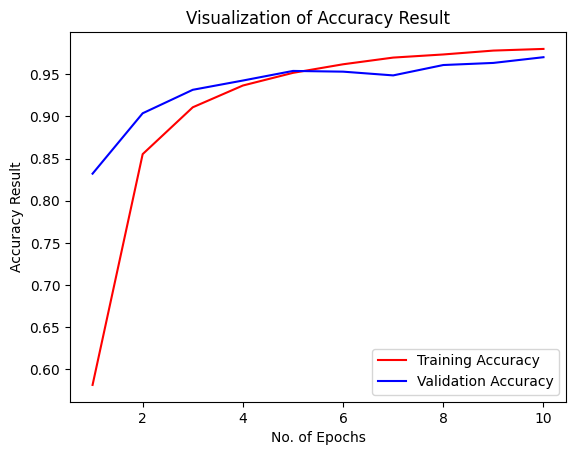

In [91]:
epochs = [i for i in range(1,11)]
epochs
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for Model evaluation

In [95]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [97]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [101]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 33s 60ms/step


(array([[9.9999177e-01, 1.1983556e-06, 1.4688216e-10, ..., 1.2753173e-13,
         9.8744370e-14, 6.9348749e-11],
        [1.0000000e+00, 5.3564559e-08, 1.7417440e-13, ..., 2.9452968e-19,
         3.4222783e-19, 2.4493890e-17],
        [1.0000000e+00, 1.3606949e-10, 1.2661293e-10, ..., 2.5901798e-18,
         4.9137625e-17, 1.8189016e-14],
        ...,
        [1.6484276e-09, 1.2953230e-12, 6.8818807e-08, ..., 7.5878658e-11,
         2.4376612e-11, 9.9999809e-01],
        [1.7770656e-09, 1.3592353e-12, 3.8663746e-08, ..., 1.1708154e-09,
         1.0894305e-11, 9.9999976e-01],
        [4.9519603e-14, 4.5294478e-17, 7.1682309e-13, ..., 2.4948926e-15,
         4.1912965e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [103]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [105]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [113]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [115]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.95      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.97      0.96      0.96       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.86      0.91       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [125]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[481,   5,   3, ...,   0,   0,   0],
       [  0, 490,   0, ...,   0,   0,   0],
       [  0,   1, 433, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 478]], dtype=int64)

### Confusion Matrix Visualization

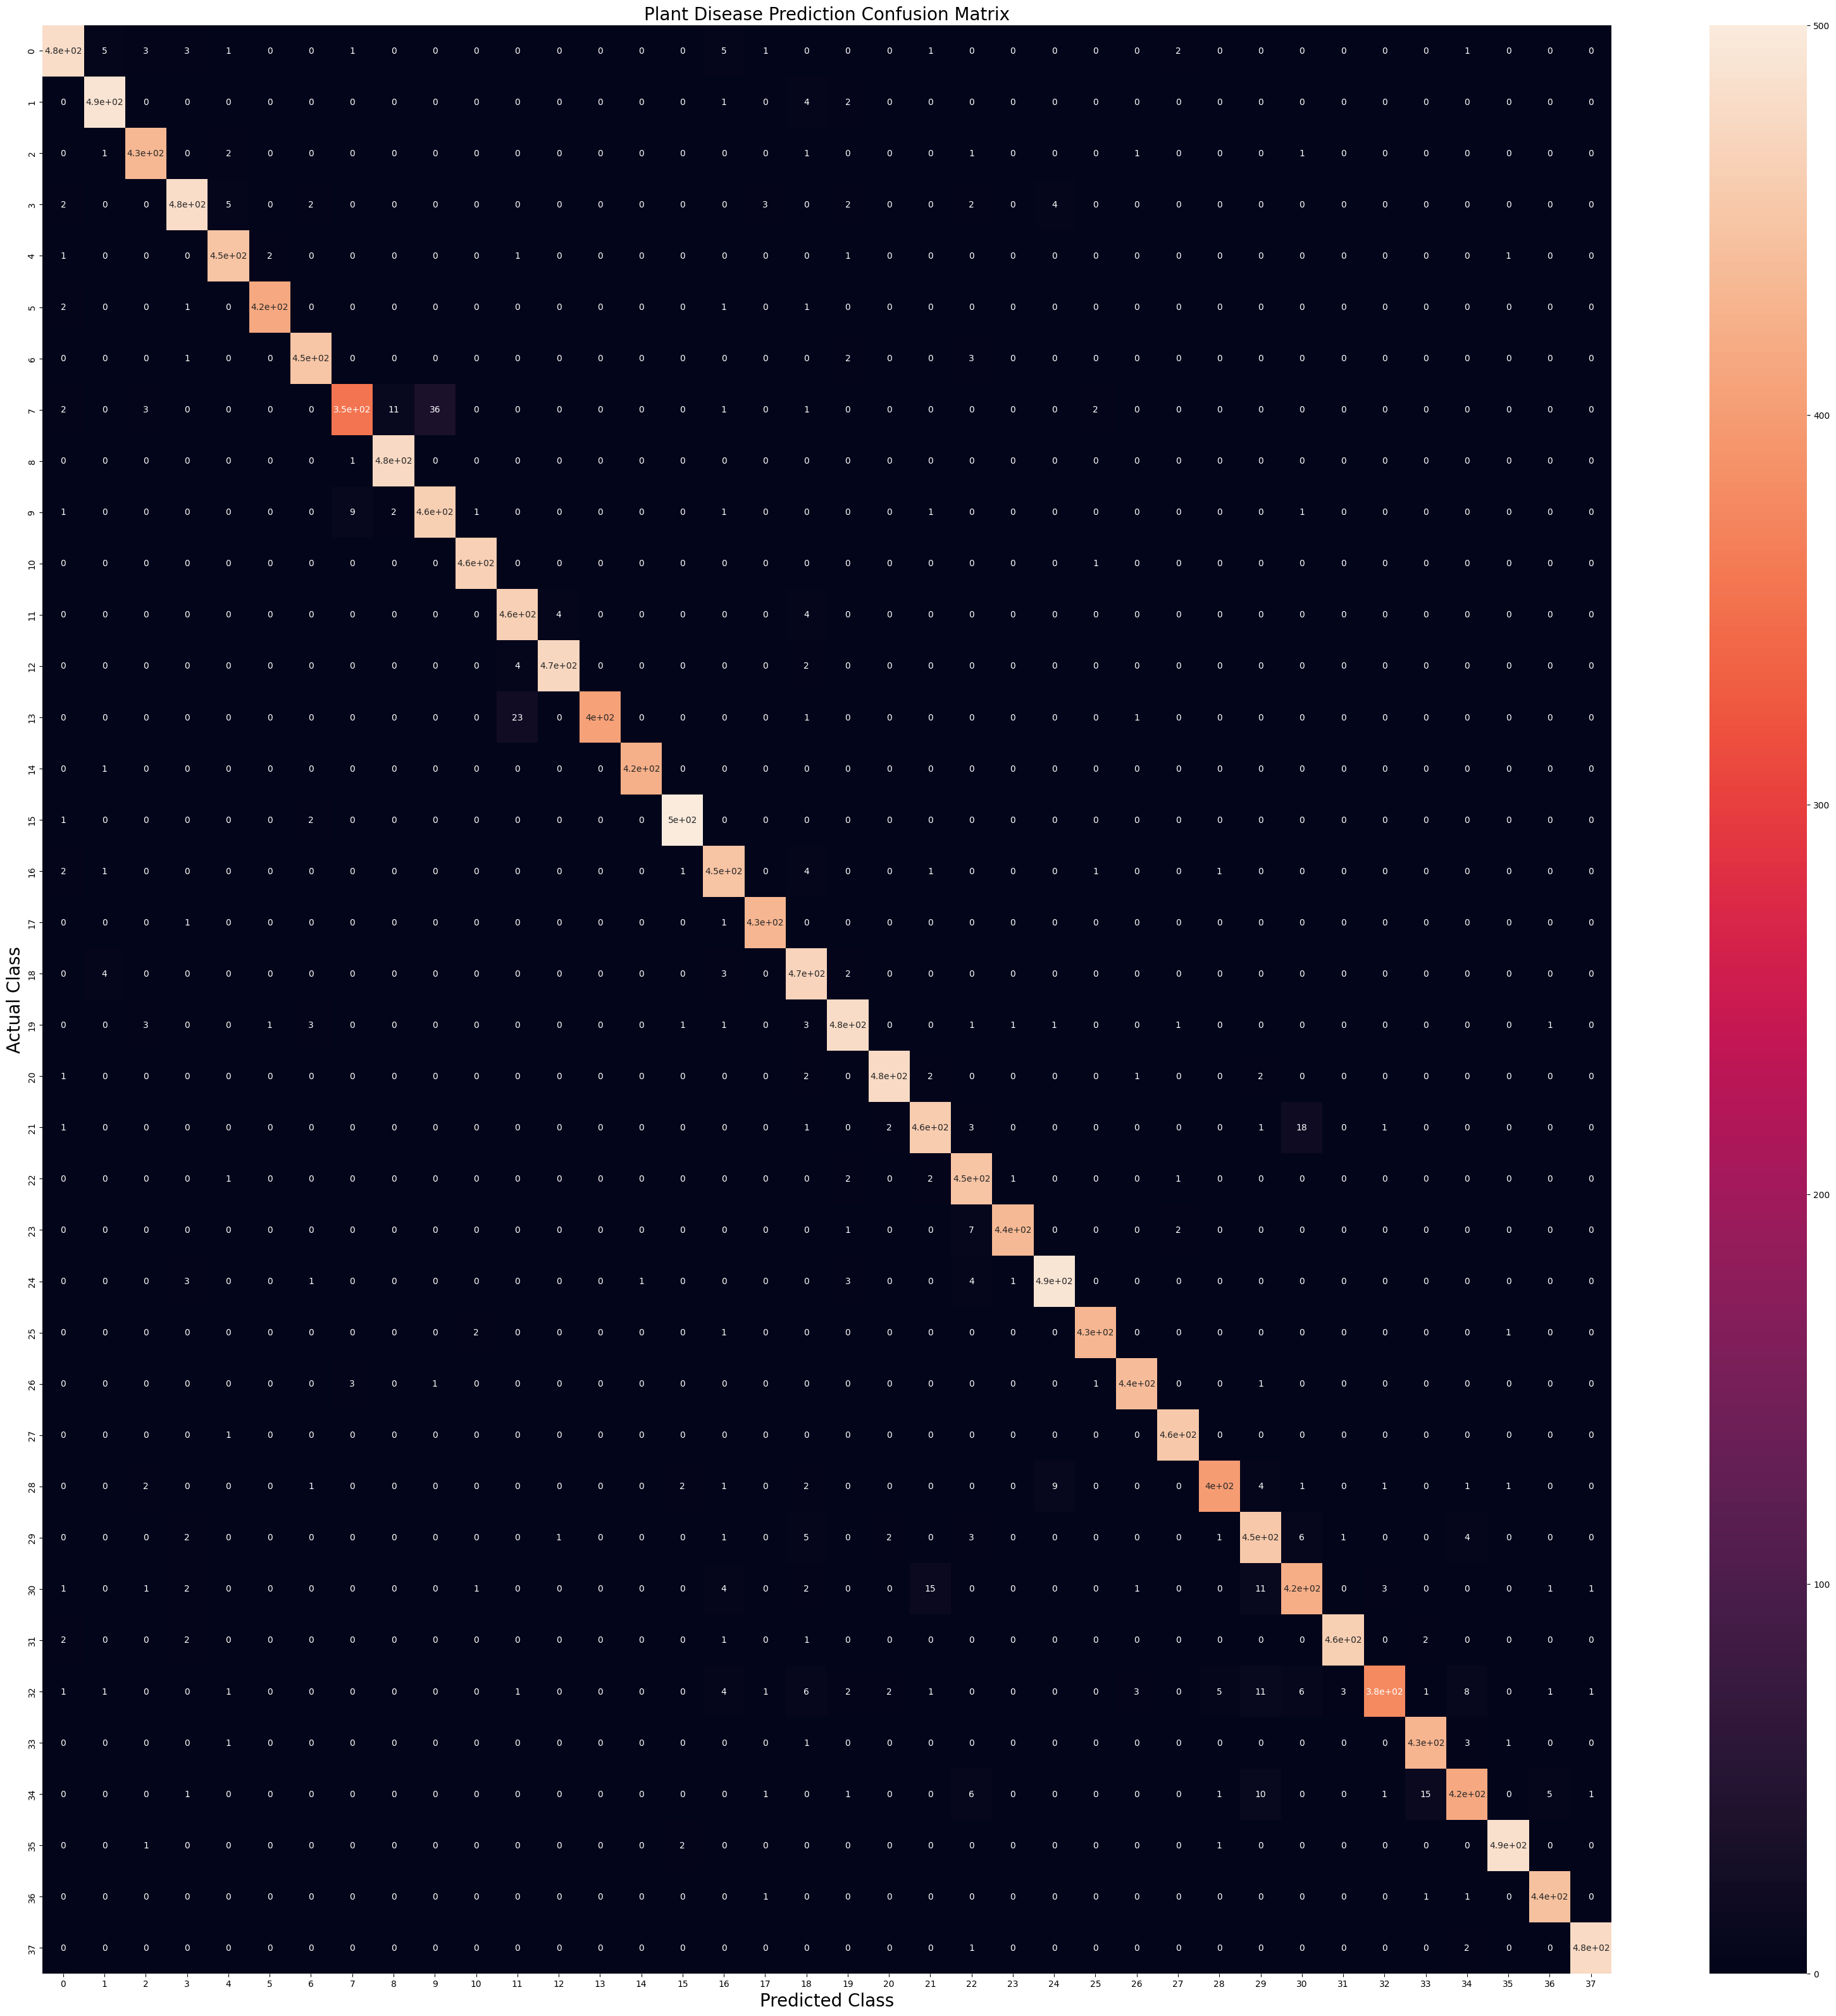

In [144]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=20)
plt.show()